In [1]:
import requests as req
import pandas as pd
import datetime

In [136]:
startdate = '2020/04/01'

Enddate = datetime.datetime.strptime(startdate,'%Y/%m/%d')+datetime.timedelta(days=30)

Enddate = datetime.datetime.strftime(Enddate,'%Y/%m/%d')

URL = 'https://www.taifex.com.tw/cht/3/pcRatio'

s = req.post(URL,{'queryStartDate':startdate,'queryEndDate':Enddate})

df = pd.read_html(s.text,header = None)

In [6]:
URL_stock = 'https://goodinfo.tw/StockInfo/ShowK_Chart.asp?STOCK_ID=%E5%8A%A0%E6%AC%8A%E6%8C%87%E6%95%B8&CHT_CAT2=DATE'

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

s_stock = req.post(URL_stock,{'STOCK_ID': '加權指數','PERIOD':'180'},headers = headers)

s_stock.encoding = 'utf_8_sig'

df_stock = pd.read_html(s_stock.text,header=None)

df_stock

[                  0        1     2   3
 0  Goodinfo!台灣股市資訊網  股票代號/名稱  登入網站 NaN,            0        1
 0  Goodinfo!  台灣股市資訊網,       0   1   2   3   4
 0  登入網站 NaN NaN NaN NaN,                                                 交易日期  開盤  \
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                                                 交易日期  開盤   
                               

In [117]:
df_stock_index = pd.DataFrame({'收盤':[i[0] for i in df_stock[14]['收盤'].values]},index = df_stock[14]['交易日期'].values[:,0])

number = [i=='04/01' for i in df_stock_index.index].index(True)

df_stock_index = df_stock_index.iloc[:[i=='04/01' for i in df_stock_index.index].index(True)+1]

df_stock_index

,收盤
05/06,10774.98
05/05,10774.61
05/04,10720.48
04/30,10992.14
04/29,10772.22
04/28,10616.06
04/27,10567.27
04/24,10347.36
04/23,10366.51
04/22,10307.74


In [145]:
df_stock_index[::-1].iloc[:20]

,收盤
04/01,9663.63
04/06,9818.74
04/07,9996.39
04/08,10137.47
04/09,10119.43
04/10,10157.61
04/13,10099.22
04/14,10332.94
04/15,10447.21
04/16,10375.48


In [146]:
context = context.iloc[::-1]
context['收盤'] = df_stock_index[::-1].iloc[:20].values[:,0]
context

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%,收盤
日期,,,,,,,
2020/4/1,495910,430542,115.18,376398,208497,180.53,9663.63
2020/4/6,382392,312512,122.36,439277,256029,171.57,9818.74
2020/4/7,437830,346389,126.40,485157,280107,173.20,9996.39
2020/4/8,702604,680084,103.31,400367,216520,184.91,10137.47
2020/4/9,284154,257290,110.44,434077,245082,177.12,10119.43
2020/4/10,216989,180812,120.01,457455,263461,173.63,10157.61
2020/4/13,223910,207353,107.98,471971,282674,166.97,10099.22
2020/4/14,493414,391711,125.96,531040,277680,191.24,10332.94
2020/4/15,560902,576079,97.37,256418,123474,207.67,10447.21


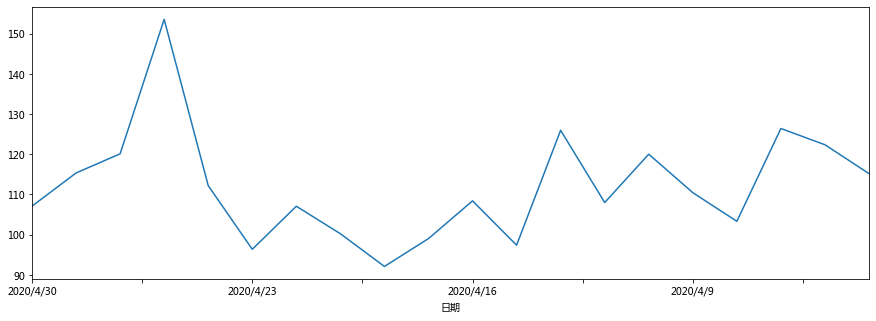

In [137]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

context = df[3]

context.index = context['日期']

context = context.iloc[:,1:]

context.iloc[:,2].plot(figsize=(15,5))

In [162]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

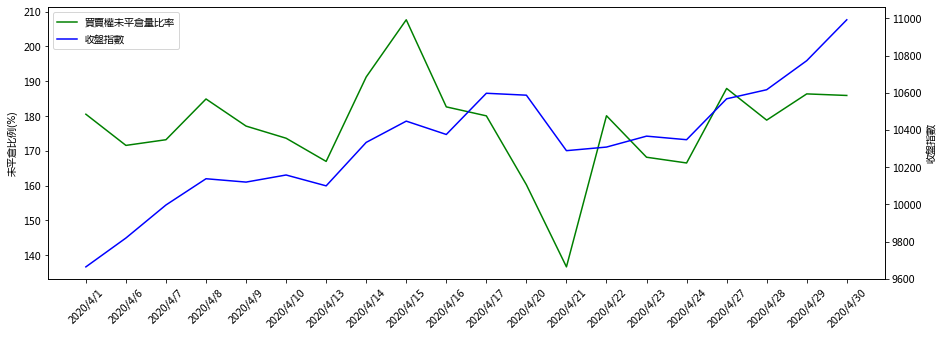

In [174]:
fig,ax1 = plt.subplots(figsize=(15,5))

x = context.index

plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax2.set_ylabel('收盤指數')

ax1.set_ylabel('未平倉比例(%)')

ax1,=ax1.plot(x,context['買賣權未平倉量比率%'],'g')

ax2,=ax2.plot(x,context['收盤'],'b')

plt.legend([ax1,ax2],['買賣權未平倉量比率','收盤指數'],loc='upper left')

plt.show()